This notebook will be more hands on than the others.

Each lesson will be divided into these sections:
1. "Meet Trinity" - tl;dr, what is <subject> ?
2. "Should I take the blue pill?" - Why dafak I need this shit?
3.  "Meet Morpheus" - Some theoretical background
4. "I know Kung Fu"- Hands on experience


# "I know Kung Fu"- Hands on experience

Lets load some dataset

In [95]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df["lable"] = np.random.randint(2, size=50)
df.head(10)

,A,B,C,D,lable
0,1.367867,0.090181,0.091371,-1.269819,0
1,-0.763982,-0.483570,0.239094,1.184295,0
2,1.095140,1.415547,0.333532,0.717807,0
3,0.561833,0.739893,1.849678,0.726734,1
4,-3.103210,-1.076434,0.306833,-0.255321,0
5,-0.802255,-0.222101,0.357033,1.736697,0
6,-0.690283,-0.302741,-0.095963,-0.451527,1
7,-1.140417,1.217756,1.328280,0.823268,1
8,-1.706635,0.058131,-1.893811,-0.752452,0
9,-0.809277,0.749256,-3.235497,-0.890665,0


print columns names

In [96]:
df.columns

Index([u'A', u'B', u'C', u'D', u'lable'], dtype='object')

Select some columns to be the features, and other to be lable

In [97]:
features = df.iloc[:,:-1]
print(features.head())
labels = df.iloc[:,-1:]
print(labels.head())


          A         B         C         D
0  1.367867  0.090181  0.091371 -1.269819
1 -0.763982 -0.483570  0.239094  1.184295
2  1.095140  1.415547  0.333532  0.717807
3  0.561833  0.739893  1.849678  0.726734
4 -3.103210 -1.076434  0.306833 -0.255321
   lable
0      0
1      0
2      0
3      1
4      0


### What to do with missing data?

Read this about missing data - https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
We will cover this in other notebook

In [98]:
features["A"][2] = np.NaN
features["B"][3] = np.NaN
features.head()

,A,B,C,D
0,1.367867,0.090181,0.091371,-1.269819
1,-0.763982,-0.483570,0.239094,1.184295
2,NaN,1.415547,0.333532,0.717807
3,0.561833,NaN,1.849678,0.726734
4,-3.103210,-1.076434,0.306833,-0.255321


Use imputer object to impute missing values (imputation is'nt always a good idea)

In [99]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN', strategy='mean',axis=0)
imputer = imputer.fit(features.iloc[:,0:2])

# print detailes about the features - check the mean
print(features.describe())
features.iloc[:,0:2] = imputer.transform(features.iloc[:,0:2])
features.head()

               A          B          C          D
count  49.000000  49.000000  50.000000  50.000000
mean   -0.058904   0.166187   0.009806   0.149115
std     1.011793   0.900125   1.311219   1.012540
min    -3.103210  -2.350054  -3.235497  -2.134908
25%    -0.763982  -0.302741  -0.551989  -0.604252
50%    -0.201590   0.090181   0.177575   0.138967
75%     0.561833   0.735227   0.960125   0.848648
max     2.064171   2.242124   2.561874   2.507348


D:\Users\gelleral\AppData\Local\Continuum\Miniconda2\envs\DS_Core\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,A,B,C,D
0,1.367867,0.090181,0.091371,-1.269819
1,-0.763982,-0.483570,0.239094,1.184295
2,-0.058904,1.415547,0.333532,0.717807
3,0.561833,0.166187,1.849678,0.726734
4,-3.103210,-1.076434,0.306833,-0.255321


Add categorical data

In [100]:
features["Categorical_data"] = "Category 1"
features["Categorical_data"][25:] = "Category 2"
features.head(30)

D:\Users\gelleral\AppData\Local\Continuum\Miniconda2\envs\DS_Core\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,A,B,C,D,Categorical_data
0,1.367867,0.090181,0.091371,-1.269819,Category 1
1,-0.763982,-0.483570,0.239094,1.184295,Category 1
2,-0.058904,1.415547,0.333532,0.717807,Category 1
3,0.561833,0.166187,1.849678,0.726734,Category 1
4,-3.103210,-1.076434,0.306833,-0.255321,Category 1
5,-0.802255,-0.222101,0.357033,1.736697,Category 1
6,-0.690283,-0.302741,-0.095963,-0.451527,Category 1
7,-1.140417,1.217756,1.328280,0.823268,Category 1
8,-1.706635,0.058131,-1.893811,-0.752452,Category 1
9,-0.809277,0.749256,-3.235497,-0.890665,Category 1


Encode categorical features into numerical features

In [101]:
from sklearn.preprocessing import LabelEncoder

lable_encoder_F = LabelEncoder()
features["Categorical_data"] = lable_encoder_F.fit_transform(features["Categorical_data"])
features

,A,B,C,D,Categorical_data
0,1.367867,0.090181,0.091371,-1.269819,0
1,-0.763982,-0.483570,0.239094,1.184295,0
2,-0.058904,1.415547,0.333532,0.717807,0
3,0.561833,0.166187,1.849678,0.726734,0
4,-3.103210,-1.076434,0.306833,-0.255321,0
5,-0.802255,-0.222101,0.357033,1.736697,0
6,-0.690283,-0.302741,-0.095963,-0.451527,0
7,-1.140417,1.217756,1.328280,0.823268,0
8,-1.706635,0.058131,-1.893811,-0.752452,0
9,-0.809277,0.749256,-3.235497,-0.890665,0


We dont want our ML models to think that category 1 is greater than category 2. 
For example, if our categories were 3 countries, Germany,France,Denemark. Lets assume the above method will give Germany=0,France=1 and Denemark=2. 
In math we know that 2 is greater than 0 in 2 units, but, Denemark isn't greater that Germany in two units. So we dont want our model to think so. 
So we will convert our categorical data into what called Dummy Encoding (or one hot encoding).
We will convert a categorical column with X distinct values (in our case X=3) into X new columns, where for each row,there will be 1 in the column with its category, and 0 on the other columns.
So for example, in our exaple above, we will conver the country column with 3 distinct values into 3 columns.
First column will represent Germany, second will represent France and the third will represent Denemark.
If a row had France value in the country column, we will assing 0 in the Germany column, 1 in the France column and 0 in the Denemark column for this row.
We will do in for all of our rows.
This way the error distance between Germany to Denemark, From Denemark to France and any other 2 different countries combination will be 1. 
This way we will not confuse our ML model too much.

We will use oneHotEncoder to transform our categorical column(that was transformed to 0 or 1 values) into several columns(2 columns in our case)

In [130]:
from sklearn.preprocessing import OneHotEncoder
features_one_hot = pd.concat([features,pd.get_dummies(features['Categorical_data'], prefix='Categorical_data')],axis=1)
features_one_hot


,A,B,C,D,Categorical_data,Categorical_data_0,Categorical_data_1
0,1.367867,0.090181,0.091371,-1.269819,0,1,0
1,-0.763982,-0.483570,0.239094,1.184295,0,1,0
2,-0.058904,1.415547,0.333532,0.717807,0,1,0
3,0.561833,0.166187,1.849678,0.726734,0,1,0
4,-3.103210,-1.076434,0.306833,-0.255321,0,1,0
5,-0.802255,-0.222101,0.357033,1.736697,0,1,0
6,-0.690283,-0.302741,-0.095963,-0.451527,0,1,0
7,-1.140417,1.217756,1.328280,0.823268,0,1,0
8,-1.706635,0.058131,-1.893811,-0.752452,0,1,0
9,-0.809277,0.749256,-3.235497,-0.890665,0,1,0


# Feature scaling

Some times we will have a big difference between the scales of the features.
For example, one column values will be between 1-7 (column of day number for exaple), and another from 4000-10000 (salary for example).
In this case, because the ML models using distance functions (usually euclidian), the salary column values will dominate our calculations. It's not a good thing to have.
So we can use standardisation or normalization techniques to solve this problem.

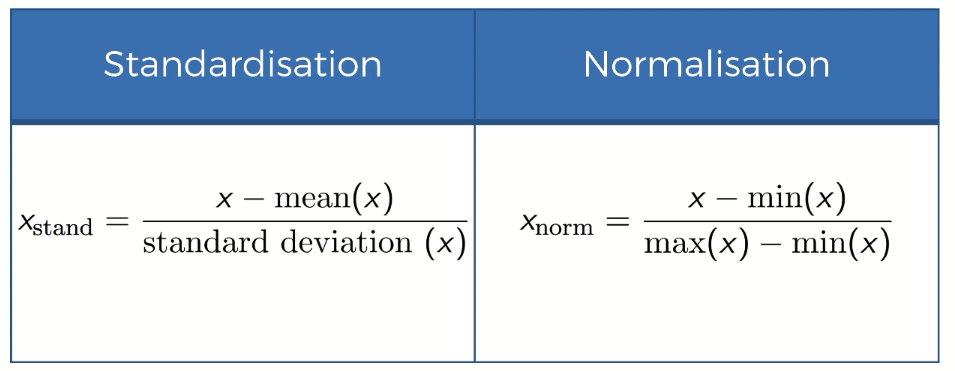

<b>Important</b> - When scanling, use fit_transform on the train set, but use only transform on the test set.
It means, calculate the mean of the train set and transform your train values accordingly.
But, when you want to normalize the test set, that need to represent the real world, we should'nt know it's distrebutions in advance, so we will scale our test set accurding to the mean/std or min/max of our train set.

In [134]:
from sklearn.preprocessing import  StandardScaler
sc= StandardScaler()
sc_features = sc.fit_transform(features_one_hot)
scaled_features_df = pd.DataFrame(sc_features, index=features_one_hot.index, columns=features_one_hot.columns)
scaled_features_df.head()

,A,B,C,D,Categorical_data,Categorical_data_0,Categorical_data_1
0,1.439220e+00,-8.618052e-02,0.062837,-1.415588,-1.0,1.0,-1.0
1,-7.112302e-01,-7.367379e-01,0.176641,1.032739,-1.0,1.0,-1.0
2,-4.199662e-17,1.416607e+00,0.249395,0.567350,-1.0,1.0,-1.0
3,6.261534e-01,-9.441330e-17,1.417423,0.576257,-1.0,1.0,-1.0
4,-3.070868e+00,-1.408966e+00,0.228827,-0.403483,-1.0,1.0,-1.0


Some ML algorithms don't use euclidean distances, like decision trees, but we still will want to normalize our data because the algorithms will converge much faster.

In classification we dont need to scale our label features, but in regression tasks we will do it.

### Sources:
Missing data - https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4